<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [20]:
!pip install pandas

In [21]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [22]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-12-16 22:43:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.6MB/s    in 2.6s    

2025-12-16 22:44:00 (59.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



NaN Values: 
 22879 


Cleaned NaN Values: 
 0 




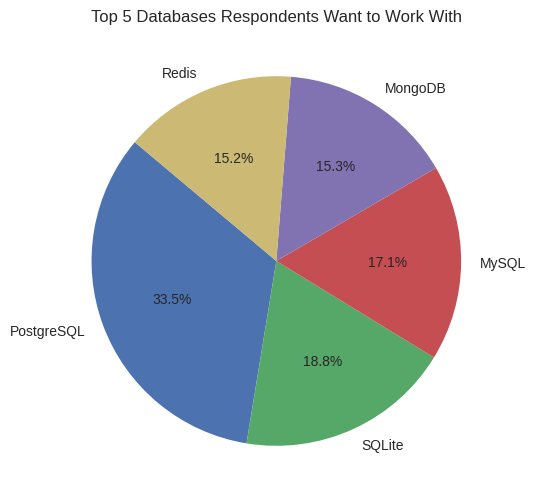

In [23]:
##Write your code here
## Find NaN and Drop Them
print("NaN Values: \n", df['DatabaseWantToWorkWith'].isnull().sum(), "\n\n")
df_a = df.dropna(subset=['DatabaseWantToWorkWith'])
print("Cleaned NaN Values: \n", df_a['DatabaseWantToWorkWith'].isnull().sum(), "\n\n")

## Split semi-colon separated values
df_b = df_a.assign(Database=df_a['DatabaseWantToWorkWith'].str.split(';'))

## Explode Database into one Database per row per respondent
df_b = df_b.explode('Database')

## Clean white space
df_b['Database'] = df_b['Database'].str.strip()

## Filter Top 5 Databases users want to work with
top5 = df_b['Database'].value_counts().nlargest(5)

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(top5, labels=top5.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Top 5 Databases Respondents Want to Work With')
plt.show()

The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



NaN Values: 
 4039 


Cleaned NaN Values: 
 0 




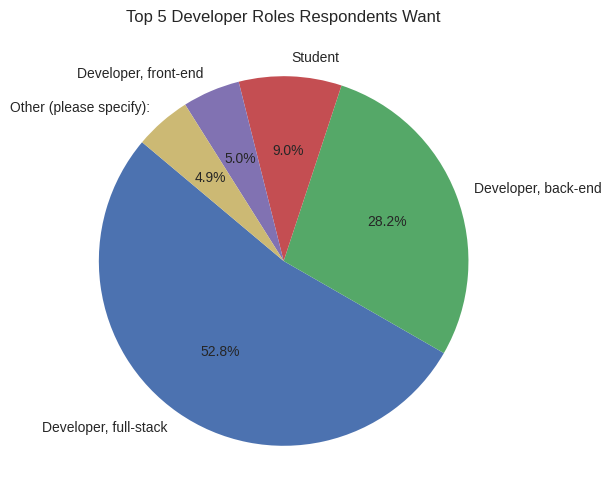

In [24]:
##Write your code here
## Find and replace NaN Values
print("NaN Values: \n", df_b['DevType'].isnull().sum(), "\n\n")
df_c = df_b.dropna(subset=['DevType'])
print("Cleaned NaN Values: \n", df_c['DevType'].isnull().sum(), "\n\n")

## Explode DevType into one DevType per row per respondent
df_c = df_c.explode('DevType')

## Clean white space
df_c['DevType'] = df_c['DevType'].str.strip()

## Filter top 5 DevTypes
top5_new = df_c['DevType'].value_counts().nlargest(5)

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(top5_new, labels=top5_new.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Top 5 Developer Roles Respondents Want')
plt.show()

##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



NaN Values: 
 12464 


Cleaned NaN Values: 
 0 




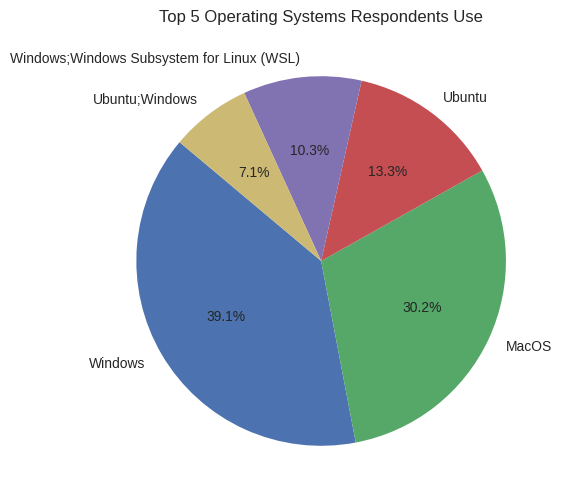

In [30]:
##Write your code here
## Find and replace NaN Values
print("NaN Values: \n", df['OpSysProfessional use'].isnull().sum(), "\n\n")
df_c = df.dropna(subset=['OpSysProfessional use'])
print("Cleaned NaN Values: \n", df_c['OpSysProfessional use'].isnull().sum(), "\n\n")

## Explode DevType into one DevType per row per respondent
df_c = df_c.explode('OpSysProfessional use')

## Clean white space
df_c['OpSysProfessional use'] = df_c['OpSysProfessional use'].str.strip()

## Filter top 5 DevTypes
top5_new = df_c['OpSysProfessional use'].value_counts().nlargest(5)

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(top5_new, labels=top5_new.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Top 5 Operating Systems Respondents Use')
plt.show()

### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



NaN Values: 
 5692 


Cleaned NaN Values: 
 0 




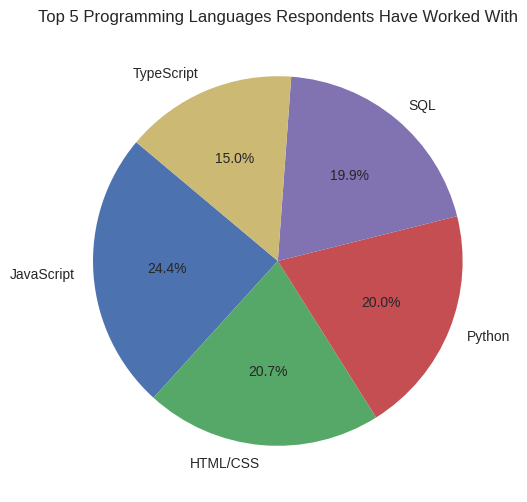

In [42]:
##Write your code here
## Find and replace NaN Values
print("NaN Values: \n", df['LanguageHaveWorkedWith'].isnull().sum(), "\n\n")
df_c = df.dropna(subset=['LanguageHaveWorkedWith'])
print("Cleaned NaN Values: \n", df_c['LanguageHaveWorkedWith'].isnull().sum(), "\n\n")

## Splitting semi-colon separated values
df_d = df_c.assign(Language=df_c['LanguageHaveWorkedWith'].str.split(';')) 

## Explode DevType into one DevType per row per respondent
df_d = df_d.explode('Language')

## Clean white space
df_d['Language'] = df_d['Language'].str.strip()

## Filter top 5 DevTypes
top5_new = df_d['Language'].value_counts().nlargest(5)

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(top5_new, labels=top5_new.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Top 5 Programming Languages Respondents Have Worked With')
plt.show()

##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



NaN Values: 
 7845 


Cleaned NaN Values: 
 0 




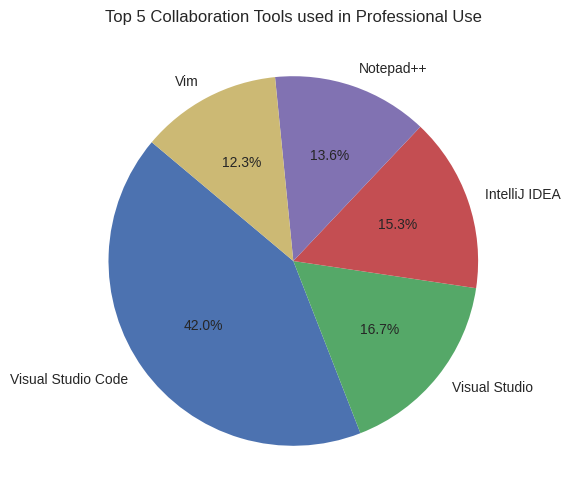

In [43]:
##Write your code here
## Find and replace NaN Values
print("NaN Values: \n", df['NEWCollabToolsHaveWorkedWith'].isnull().sum(), "\n\n")
df_c = df.dropna(subset=['NEWCollabToolsHaveWorkedWith'])
print("Cleaned NaN Values: \n", df_c['NEWCollabToolsHaveWorkedWith'].isnull().sum(), "\n\n")

## Splitting semi-colon separated values
df_d = df_c.assign(Tool=df_c['NEWCollabToolsHaveWorkedWith'].str.split(';')) 

## Explode DevType into one DevType per row per respondent
df_d = df_d.explode('Tool')

## Clean white space
df_d['Tool'] = df_d['Tool'].str.strip()

## Filter top 5 DevTypes
top5_new = df_d['Tool'].value_counts().nlargest(5)

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(top5_new, labels=top5_new.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Top 5 Collaboration Tools used in Professional Use')
plt.show()

### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



NaN Values: 
 14565 


Cleaned NaN Values: 
 0 




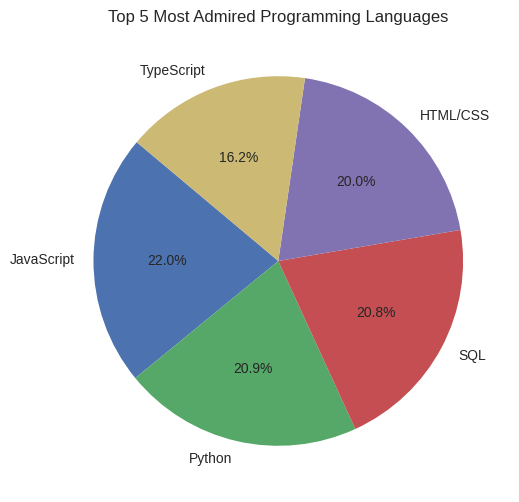

In [44]:
##Write your code here
## Find and replace NaN Values
print("NaN Values: \n", df['LanguageAdmired'].isnull().sum(), "\n\n")
df_c = df.dropna(subset=['LanguageAdmired'])
print("Cleaned NaN Values: \n", df_c['LanguageAdmired'].isnull().sum(), "\n\n")

## Splitting semi-colon separated values
df_d = df_c.assign(Language=df_c['LanguageAdmired'].str.split(';')) 

## Explode DevType into one DevType per row per respondent
df_d = df_d.explode('Language')

## Clean white space
df_d['Language'] = df_d['Language'].str.strip()

## Filter top 5 DevTypes
top5_new = df_d['Language'].value_counts().nlargest(5)

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(top5_new, labels=top5_new.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Top 5 Most Admired Programming Languages')
plt.show()

##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



NaN Values: 
 30365 


Cleaned NaN Values: 
 0 




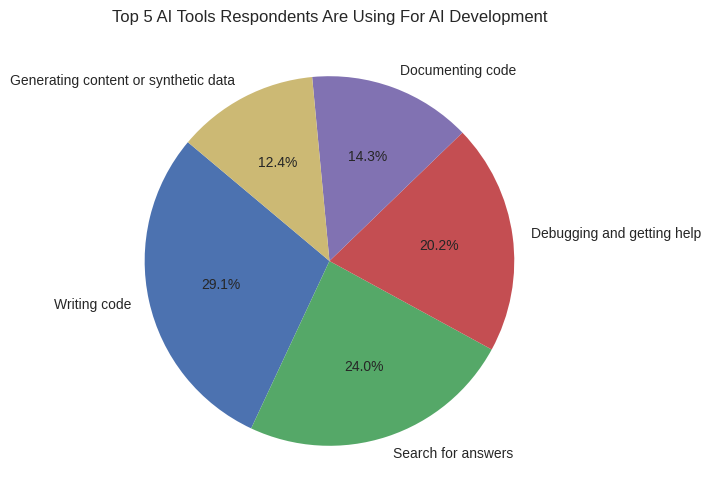

In [38]:
##Write your code here
## Find and replace NaN Values
print("NaN Values: \n", df['AIToolCurrently Using'].isnull().sum(), "\n\n")
df_c = df.dropna(subset=['AIToolCurrently Using'])
print("Cleaned NaN Values: \n", df_c['AIToolCurrently Using'].isnull().sum(), "\n\n")

## Splitting semi-colon separated values
df_d = df_c.assign(AITool=df_c['AIToolCurrently Using'].str.split(';')) 

## Explode DevType into one DevType per row per respondent
df_d = df_d.explode('AITool')

## Clean white space
df_d['AITool'] = df_d['AITool'].str.strip()

## Filter top 5 DevTypes
top5_new = df_d['AITool'].value_counts().nlargest(5)

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(top5_new, labels=top5_new.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Top 5 AI Tools Respondents Are Using For AI Development')
plt.show()

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



NaN Values: 
 26902 


Cleaned NaN Values: 
 0 




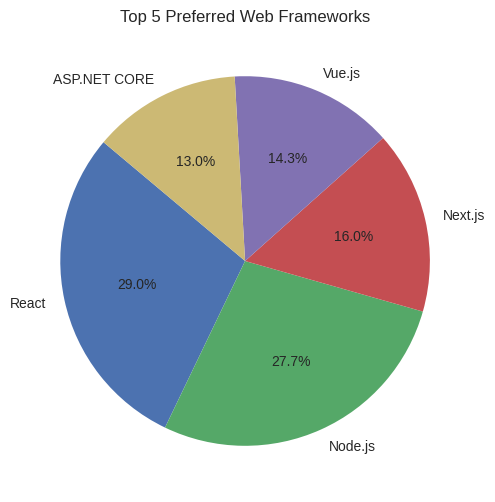

In [45]:
##Write your code here
## Find and replace NaN Values
print("NaN Values: \n", df['WebframeWantToWorkWith'].isnull().sum(), "\n\n")
df_c = df.dropna(subset=['WebframeWantToWorkWith'])
print("Cleaned NaN Values: \n", df_c['WebframeWantToWorkWith'].isnull().sum(), "\n\n")

## Splitting semi-colon separated values
df_d = df_c.assign(Webframe=df_c['WebframeWantToWorkWith'].str.split(';')) 

## Explode DevType into one DevType per row per respondent
df_d = df_d.explode('Webframe')

## Clean white space
df_d['Webframe'] = df_d['Webframe'].str.strip()

## Filter top 5 DevTypes
top5_new = df_d['Webframe'].value_counts().nlargest(5)

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(top5_new, labels=top5_new.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Top 5 Preferred Web Frameworks')
plt.show()

##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



NaN Values: 
 47837 


Cleaned NaN Values: 
 0 




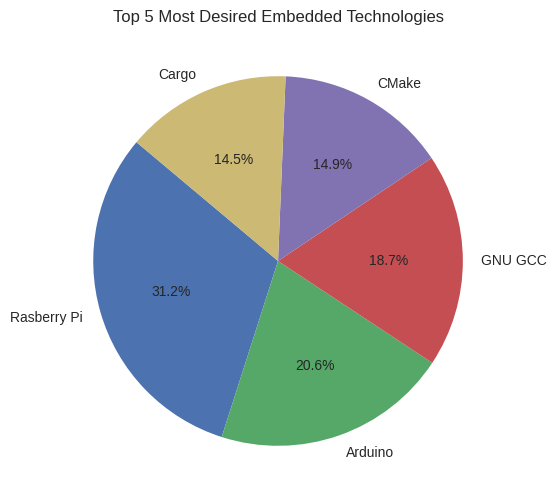

In [46]:
##Write your code here
## Find and replace NaN Values
print("NaN Values: \n", df['EmbeddedWantToWorkWith'].isnull().sum(), "\n\n")
df_c = df.dropna(subset=['EmbeddedWantToWorkWith'])
print("Cleaned NaN Values: \n", df_c['EmbeddedWantToWorkWith'].isnull().sum(), "\n\n")

## Splitting semi-colon separated values
df_d = df_c.assign(Want=df_c['EmbeddedWantToWorkWith'].str.split(';')) 

## Explode DevType into one DevType per row per respondent
df_d = df_d.explode('Want')

## Clean white space
df_d['Want'] = df_d['Want'].str.strip()

## Filter top 5 DevTypes
top5_new = df_d['Want'].value_counts().nlargest(5)

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(top5_new, labels=top5_new.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Top 5 Most Desired Embedded Technologies')
plt.show()

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
